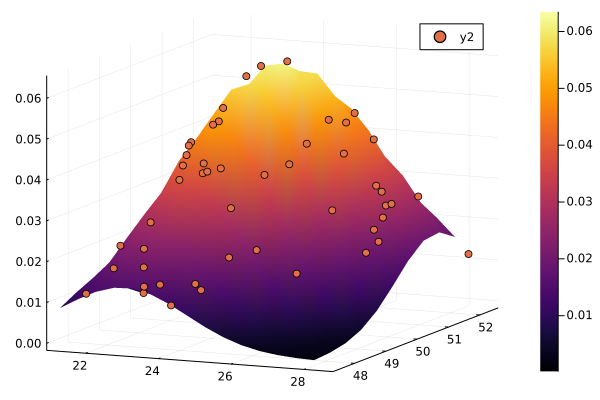

In [85]:
# Train data
using Distributions
N = 100
D = 2
μ = [25; 50]
Σ = [
    4.0 √3
    √3 2.0
]

Λ = inv(Σ); 

Xᵗ = rand(MvNormal(μ, Σ), N)

# Test data
Xᵖ = rand(MvNormal(μ, Σ), 50)

# Hyperparameter
W = [
    1.0 0
    0 1.0
]
ν = 2.0

# Training
invŴ = inv(W)
for n in 1:N
    xₙ = Xᵗ[:,n]
    invŴ += (xₙ-μ)*(xₙ-μ)'
end

Ŵ = inv(invŴ)
ν̂ = N+ν

# Prediction
μₛ = μ
Λ̂ₛ = (1-D+ν̂)Ŵ
ν̂ₛ = 1-D+ν̂

# Plot
using SpecialFunctions: gamma
using LinearAlgebra
using Plots

const Γ = gamma

St(x) = Γ(0.5(ν̂ₛ+D))/Γ(0.5ν̂ₛ) * √(det(Λ̂ₛ))/(π*ν̂ₛ)^(0.5D) * (1+inv(ν̂ₛ)*dot((x.-μₛ)', Λ̂ₛ, (x.-μₛ)))^(-0.5(ν̂ₛ+D))
St(x, y) = St([x, y])
xs = minimum(Xᵖ[1,:]):0.5:maximum(Xᵖ[1,:])
ys = minimum(Xᵖ[2,:]):0.5:maximum(Xᵖ[2,:])
zs = St.(xs', ys)
p = surface(xs, ys, zs)

xs = Xᵖ[1,:]
ys = Xᵖ[2,:]
zs = St.(xs, ys)
scatter!(p, xs, ys, zs)

In [62]:
a = [
    1 
    2 
    3 
    4 
    5
]

b = [
    6 
    7 
    8 
    9 
    10
];

In [80]:
f(x) = 4x .+ 6

f (generic function with 2 methods)

In [81]:
f(x, y) = f([x, y])

f (generic function with 2 methods)

In [82]:
f.(a', b)

5×5 Array{Array{Int64,1},2}:
 [10, 30]  [14, 30]  [18, 30]  [22, 30]  [26, 30]
 [10, 34]  [14, 34]  [18, 34]  [22, 34]  [26, 34]
 [10, 38]  [14, 38]  [18, 38]  [22, 38]  [26, 38]
 [10, 42]  [14, 42]  [18, 42]  [22, 42]  [26, 42]
 [10, 46]  [14, 46]  [18, 46]  [22, 46]  [26, 46]